# $pKa$ estimates from propka using a molecular dynamics trajectory

In [18]:
import MDAnalysis as mda
from MDAnalysisTests.datafiles import PSF, DCD

For demo purposes we'll use a topology and trajectory used in the MDAnalysis test suite to make a `Universe`:

In [17]:
u = mda.Universe(PSF, DCD)

In [19]:
u

<Universe with 3341 atoms and 3365 bonds>

We want to use the function `propkatraj.get_propka`, so we need to import `propkatraj`:

In [24]:
import propkatraj

In [42]:
help(propkatraj.get_propka)

Help on function get_propka in module propkatraj:

get_propka(sim, sel='protein', start=None, stop=None, step=1)
    Get and store pKas for titrateable residues near the binding site.
    
    Parameters
    ----------
    sim : :class:`mdsynthesis.Sim`
        Sim to obtain pKas for.
    sel : str, array_like
        Selection string to use for selecting atoms to use from Sim's universe.
        Can also be a numpy array or list of atom indices to use.
    start : int
        Frame of trajectory to start from. `None` means start from beginning.
    stop : int
        Frame of trajectory to end at. `None` means end at trajectory end.
    step : int
        Step by which to iterate through trajectory frames. propka is slow,
        so set according to how finely you need resulting timeseries.
    
    Results
    -------
    sim : :class:`mdsynthesis.Sim`
        Sim that was operated on. Returned here for convenience; useful with `dask`.



Note that as written this takes an `mdsynthesis.Sim` as input. This makes it easier to do this kind of analysis with remote processes using, say, `distributed`, and the results are persisted to disk instead of in memory. This is nice in particular because running `propka` on a long trajectory with many frames is sloooooow.

In [20]:
import mdsynthesis as mds

We'll make a new `Sim` called `"testsim"`, if it doesn't already exist. This is a directory in the filesystem; see the [MDSynthesis](http://mdsynthesis.readthedocs.io/) docs for more about how this package works.

In [21]:
s = mds.Sim('testsim')

and we set the Universe definition directly:

In [22]:
s.universe = u

In [23]:
s.universe

<Universe with 3341 atoms and 3365 bonds>

Now we can run the analysis function:

In [25]:
propkatraj.get_propka(s, sel='protein')

Time (ps): 96.9999914562

<Sim: 'testsim'>

The results are written to disk inside the `Sim`'s tree:

In [43]:
s.draw()

testsim/
 +-- propka/
 |   +-- pka/
 |       +-- pdData.h5
 +-- Sim.cc0c357a-3f1b-4701-a69c-d55fe42621c0.json


and we can easily manipulate this with the `data` limb: 

In [27]:
s.data

<Data(['propka/pka'])>

In [28]:
s.data['propka/pka']

,1,2,13,22,23,24,33,36,40,44,...,192,193,195,197,200,204,206,208,210,211
time (ps),,,,,,,,,,,,,,,,,,,,,
0.000000,7.463827,12.394323,8.344347,4.089682,11.542252,11.014674,2.364393,14.056423,10.092552,3.505057,...,11.181185,13.954125,12.392177,2.179990,12.578384,3.817193,14.744914,1.736156,2.083698,11.366898
1.000000,7.295912,13.246053,8.292964,3.854538,11.335496,11.264583,2.638269,13.262729,10.088877,3.794538,...,11.221025,13.739182,12.308242,2.276176,12.686712,3.638481,15.098640,1.747098,2.081976,11.334325
2.000000,7.446632,13.206571,7.998785,4.045926,11.002587,11.863192,2.235340,13.454440,10.065400,3.569236,...,11.217360,13.806216,12.258947,2.343485,12.692147,2.838206,14.823071,1.801874,2.187098,12.052625
3.000000,7.364847,12.870917,7.608654,3.205676,11.649248,11.196828,1.891373,13.442788,10.079494,3.280471,...,11.272248,14.030501,12.313860,2.576164,12.626028,3.056464,15.060629,1.706005,2.709781,12.031399
4.000000,8.431659,12.497731,8.108605,3.366243,11.438484,11.422239,2.458694,13.349054,10.050490,3.805812,...,11.202101,13.930253,12.187661,2.475596,12.687261,2.804341,14.958514,1.825790,2.589898,12.055694
5.000000,8.413805,12.758642,7.928219,3.546709,11.525468,11.435645,2.373255,14.912229,9.960275,3.702452,...,11.276864,14.364916,12.283782,2.351434,12.634666,2.875394,14.585283,1.965401,2.853581,11.972007
5.999999,8.424927,12.865650,7.763595,3.572566,11.005743,11.877428,2.545704,13.553502,10.072688,3.628277,...,11.275164,13.754629,12.249282,2.516046,12.620409,2.873569,14.684630,1.971753,2.685383,12.087627
6.999999,8.458619,12.602061,8.214971,3.191635,11.073781,11.930756,2.676321,13.342114,10.056925,3.948229,...,11.223411,13.850106,12.139345,2.540835,12.581422,2.831289,14.934267,1.966715,2.872946,12.051454
7.999999,8.302842,12.761938,7.907986,3.244834,11.477911,11.293736,3.170560,13.115886,10.149841,3.727501,...,11.219728,14.444294,12.046917,2.350866,12.591843,2.767964,14.928158,1.881919,2.774251,12.144520


In [41]:
s.data['propka/pka'].describe()

,1,2,13,22,23,24,33,36,40,44,...,192,193,195,197,200,204,206,208,210,211
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,8.180723,12.760629,9.402281,3.488373,11.418135,11.642697,2.496965,14.049808,10.348338,3.734203,...,10.754325,14.010479,12.066464,2.110729,12.593243,2.899029,14.802091,1.901808,2.643808,12.076064
std,0.190336,0.159973,0.627494,0.303028,0.355354,0.864402,0.418063,0.506330,0.129717,0.261795,...,0.589032,0.259118,0.142012,0.325367,0.046812,0.147478,0.420380,0.121053,0.331949,0.120737
min,7.295912,12.268418,7.608654,2.946900,10.985647,10.264614,1.412159,12.838007,9.960275,2.799962,...,9.661010,13.174104,11.733061,1.249881,12.442245,2.767964,13.814350,1.528530,1.861152,11.334325
25%,8.127513,12.703356,9.423932,3.240714,11.152677,10.915393,2.234819,13.556806,10.252726,3.625440,...,10.111005,13.878456,11.970498,1.980458,12.566704,2.839813,14.535488,1.836325,2.591431,12.055367
50%,8.201208,12.762834,9.544703,3.395640,11.221198,11.460753,2.430872,14.136217,10.410696,3.835666,...,11.209223,14.035418,12.066676,2.177655,12.587065,2.861878,14.795910,1.888335,2.754077,12.089534
75%,8.273955,12.849905,9.710506,3.718057,11.620171,12.428121,2.682613,14.404762,10.430810,3.918784,...,11.260263,14.164137,12.191065,2.293660,12.621373,2.895128,15.024900,1.968771,2.852710,12.133085
max,8.458619,13.246053,10.449350,4.278961,12.282208,13.113857,3.608263,15.182562,10.460633,4.010099,...,11.331529,14.472733,12.392177,3.000020,12.692147,3.817193,15.909253,2.200353,3.381706,12.207916


Let's plot it all:

In [32]:
import seaborn as sns
%matplotlib inline

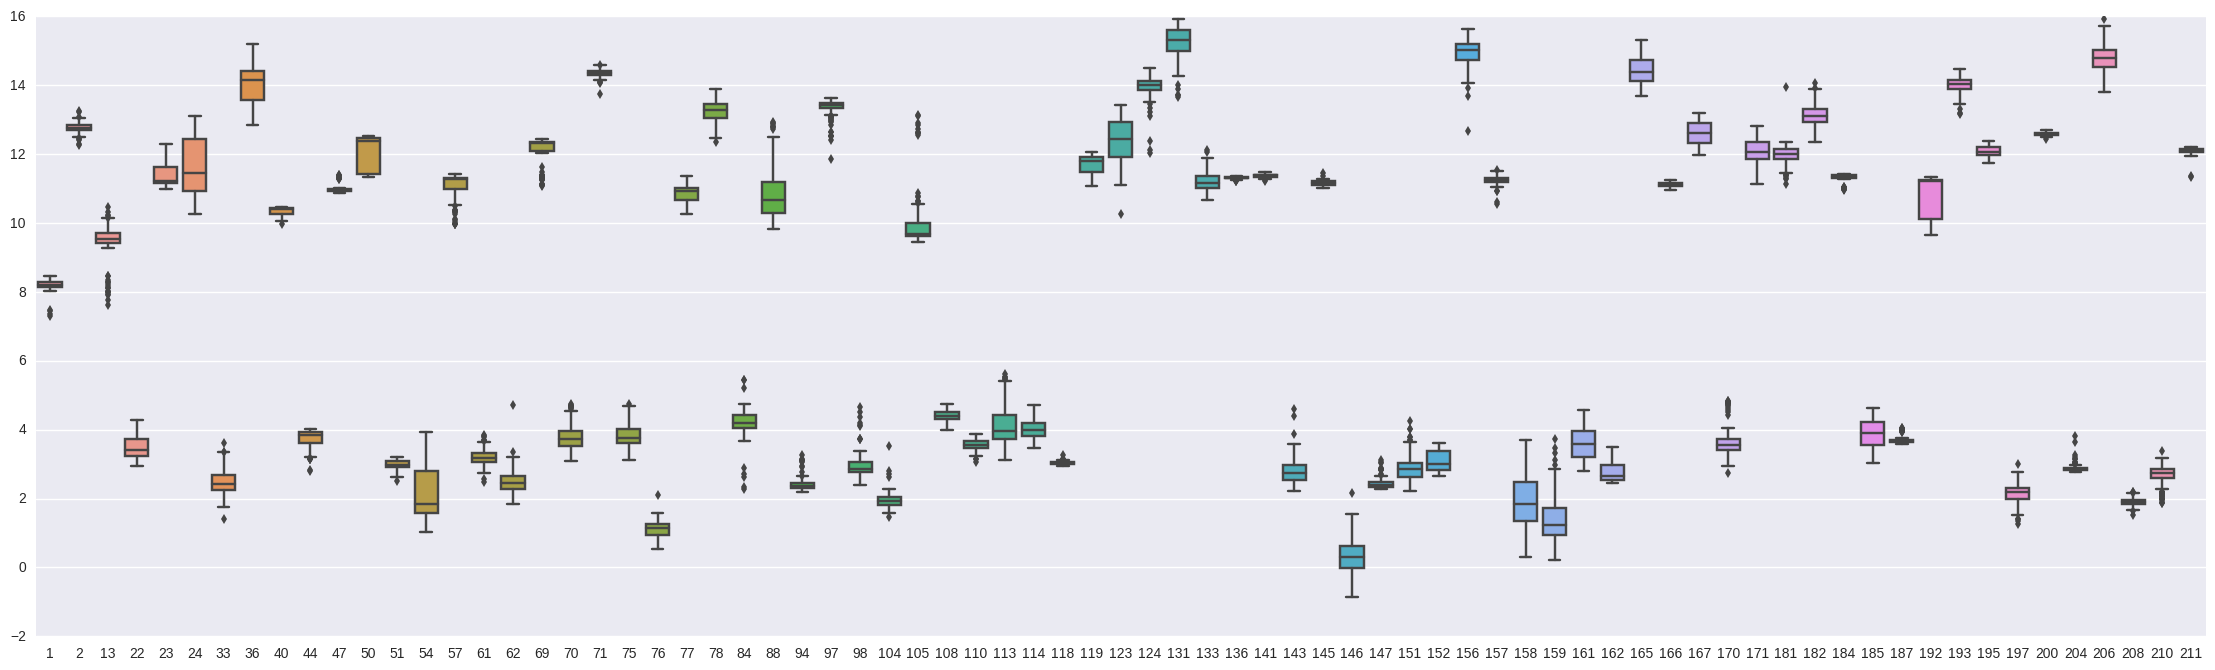

In [40]:
fig = sns.plt.figure(figsize=(28, 8))
ax = fig.add_subplot(1,1,1)

sns.boxplot(s.data['propka/pka'], ax=ax)

Want only the lysines?

In [46]:
resids = s.universe.select_atoms('resname LYS').residues.resids

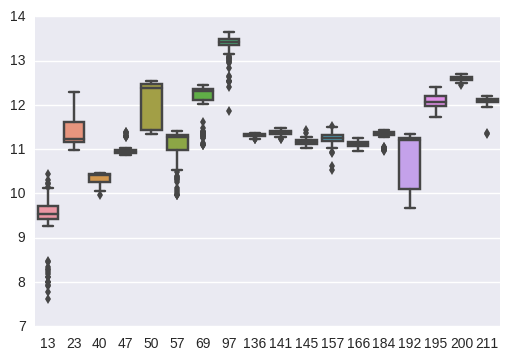

In [48]:
sns.boxplot(s.data['propka/pka'][resids])

You can use this strategy to look at any residues of interest.